# IBM Capstone Project
## This project is the final assignment for the series of IBM Data Science Professional Certificate. It serves to predict the severity of the accident from several factors

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(" Hello Capstone Project Course!")

 Hello Capstone Project Course!


In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-27 05:15:04--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  43.0MB/s   in 1.6s   

2020-08-27 05:15:06 (43.0 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [14]:
#Read the data and adjust the data we want to use
collision_data = pd.read_csv('Data-Collisions.csv')
collision_data['INATTENTIONIND'] = collision_data['INATTENTIONIND'].fillna('N')
collision_data['PEDROWNOTGRNT'] = collision_data['PEDROWNOTGRNT'].fillna('N')
collision_data['SPEEDING'] = collision_data['SPEEDING'].fillna('N')
collision_data['INCDATE'] = pd.to_datetime(collision_data['INCDATE'])
collision_data['DayofWeek'] = collision_data['INCDATE'].dt.dayofweek
collision_data['Years'] = collision_data['INCDATE'].dt.year
collision_data.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,DayofWeek,Years
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,N,NaN,N,10,Entering at angle,0,0,N,2,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,N,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N,2,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,N,4323031.0,N,32,One parked--one moving,0,0,N,3,2004
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,N,NaN,N,23,From same direction - all others,0,0,N,4,2013
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,N,4028032.0,N,10,Entering at angle,0,0,N,2,2004


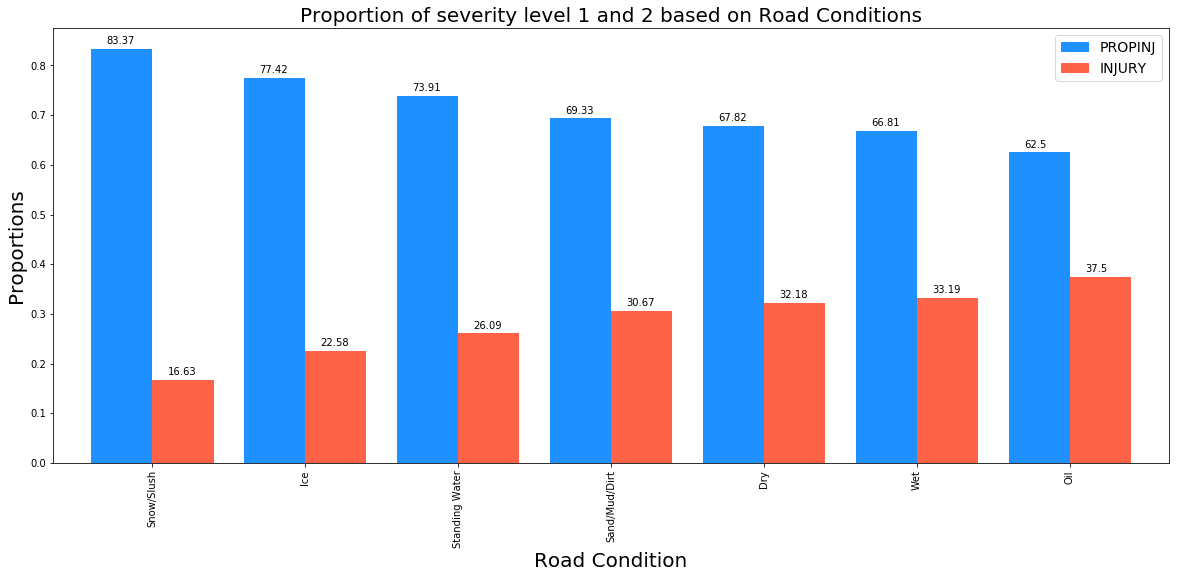

In [4]:
#Create a bar graph of Road Condition
A = collision_data.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)
RoadCond = ['Dry','Ice','Oil','Sand/Mud/Dirt','Snow/Slush','Standing Water','Wet']
List = []
List2 = []
for name in RoadCond:
    List.append(A[name][1])
    List2.append(A[name][2])
d1 = {'ROADCOND':RoadCond, 'PROPINJ':List, 'INJURY':List2}
collision_data2 = pd.DataFrame(data=d1)
collision_data2.set_index('ROADCOND', inplace = True)
collision_data2 = collision_data2.sort_values(by ='INJURY', ascending=True)
collision_data2.plot(kind='bar', figsize=(20, 8),width=0.8,
             color=['dodgerblue', 'tomato'])
plt.xlabel('Road Condition', fontsize=20)
plt.ylabel('Proportions', fontsize=20)
plt.title('Proportion of severity level 1 and 2 based on Road Conditions',fontsize=20)
plt.legend(fontsize=14)
for i, proportion1 in enumerate(collision_data2['PROPINJ']):
    plt.annotate(round(100*proportion1,2), # text to display
             xy=(i-0.3, proportion1+0.01))
for j, proportion2 in enumerate(collision_data2['INJURY']):
    plt.annotate(round(100*proportion2,2), # text to display
             xy=(j+0.1, proportion2+0.01))

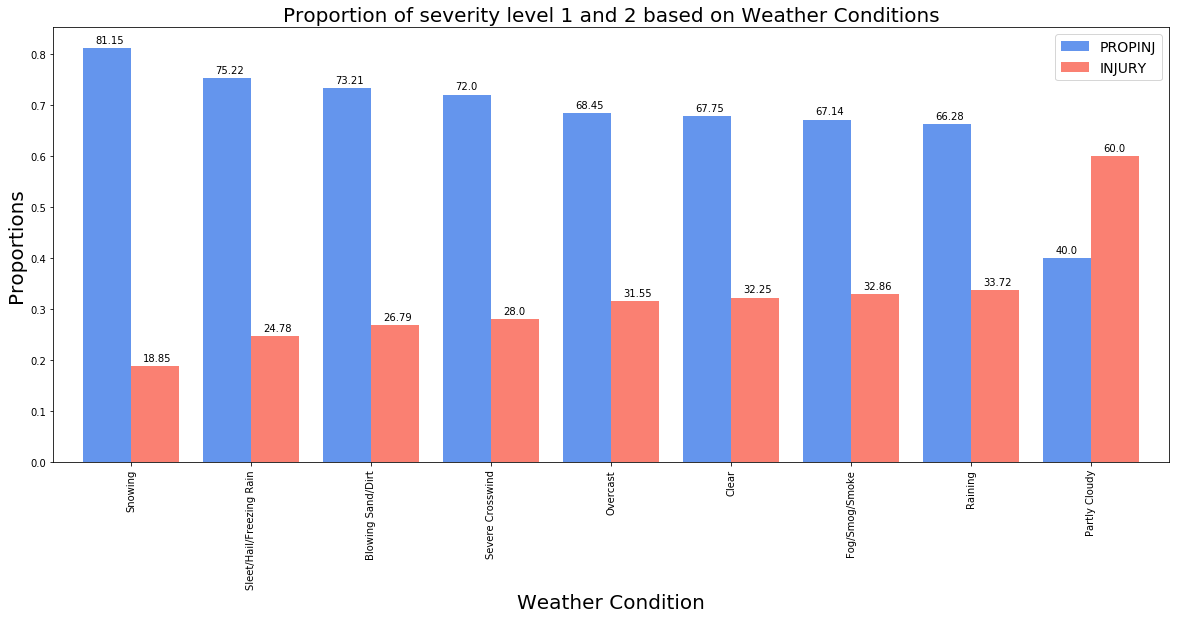

In [5]:
B = collision_data.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)
Weather = ['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing']
List21 = []
List22 = []
for name2 in Weather:
    List21.append(B[name2][1])
    List22.append(B[name2][2])
d2 = {'WEATHER':Weather, 'PROPINJ':List21, 'INJURY':List22}
collision_data3 = pd.DataFrame(data=d2)
collision_data3.set_index('WEATHER', inplace = True)
collision_data3 = collision_data3.sort_values(by ='INJURY', ascending=True)
collision_data3
collision_data3.plot(kind='bar', figsize=(20, 8),width=0.8,
             color=['cornflowerblue', 'salmon'])
plt.xlabel('Weather Condition', fontsize=20)
plt.ylabel('Proportions', fontsize=20)
plt.title('Proportion of severity level 1 and 2 based on Weather Conditions',fontsize=20)
plt.legend(fontsize=14)
for i, proportion3 in enumerate(collision_data3['PROPINJ']):
    plt.annotate(round(100*proportion3,2), # text to display
             xy=(i-0.3, proportion3+0.01))
for j, proportion4 in enumerate(collision_data3['INJURY']):
    plt.annotate(round(100*proportion4,2), # text to display
             xy=(j+0.1, proportion4+0.01))

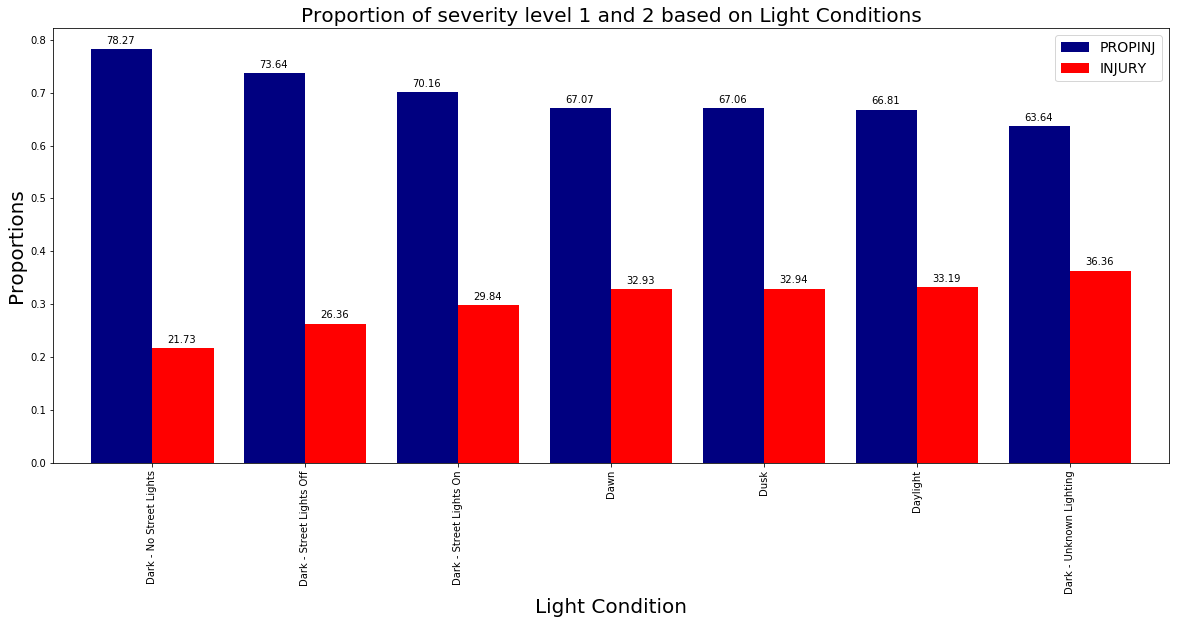

In [6]:
C = collision_data.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)
LightCond = ['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk']
List31 = []
List32 = []
for name3 in LightCond:
    List31.append(C[name3][1])
    List32.append(C[name3][2])
d3 = {'LIGHTCOND':LightCond, 'PROPINJ':List31, 'INJURY':List32}
collision_data4 = pd.DataFrame(data=d3)
collision_data4.set_index('LIGHTCOND', inplace = True)
collision_data4 = collision_data4.sort_values(by ='INJURY', ascending=True)
collision_data4.plot(kind='bar', figsize=(20, 8),width=0.8,
             color=['navy', 'red'])
plt.xlabel('Light Condition', fontsize=20)
plt.ylabel('Proportions', fontsize=20)
plt.title('Proportion of severity level 1 and 2 based on Light Conditions',fontsize=20)
plt.legend(fontsize=14)
for i, proportion11 in enumerate(collision_data4['PROPINJ']):
    plt.annotate(round(100*proportion11,2), # text to display
             xy=(i-0.3, proportion11+0.01))
for j, proportion12 in enumerate(collision_data4['INJURY']):
    plt.annotate(round(100*proportion12,2), # text to display
             xy=(j+0.1, proportion12+0.01))

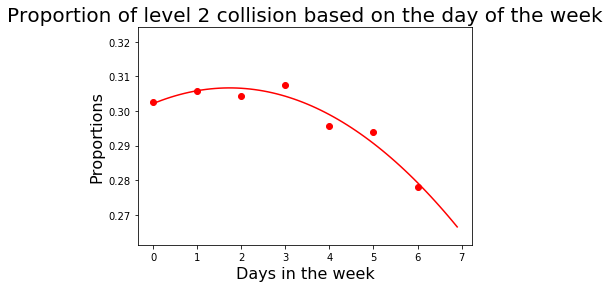

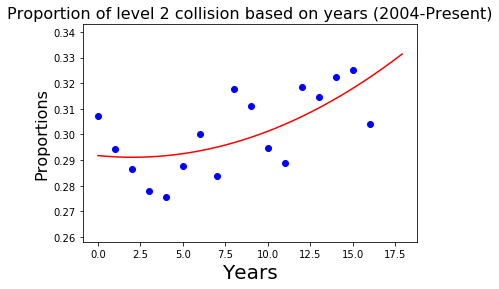

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
collision_data['INCDATE'] = pd.to_datetime(collision_data['INCDATE'])
collision_data['DayofWeek'] = collision_data['INCDATE'].dt.dayofweek
collision_data['Years'] = collision_data['INCDATE'].dt.year
Day = collision_data.groupby(['DayofWeek'])['SEVERITYCODE'].value_counts(normalize=True)
Year = collision_data.groupby(['Years'])['SEVERITYCODE'].value_counts(normalize=True)
ListDay = []
ListYear = []
for j in range(0,7):
    ListDay.append(Day[j][2])
for k in range(2004,2021):
    ListYear.append(Year[k][2])
Days = {"DAYS":range(0,7), "PROPORTION":ListDay}
Years = {"YEARS":range(0,17), "PROPORTION":ListYear}
df_day = pd.DataFrame(data=Days)
df_year = pd.DataFrame(data=Years)
#Train for the line day
msk = np.random.rand(len(df_day)) < 0.8
train = df_day[msk]
test = df_day[~msk]

train_x = np.asanyarray(train[['DAYS']])
train_y = np.asanyarray(train[['PROPORTION']])

test_x = np.asanyarray(test[['DAYS']])
test_y = np.asanyarray(test[['PROPORTION']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

#Train for the line day
msk2 = np.random.rand(len(df_year)) < 0.8
train2 = df_year[msk2]
test2 = df_year[~msk2]

train_x2 = np.asanyarray(train2[['YEARS']])
train_y2 = np.asanyarray(train2[['PROPORTION']])

test_x2 = np.asanyarray(test2[['YEARS']])
test_y2 = np.asanyarray(test2[['PROPORTION']])

poly2 = PolynomialFeatures(degree=2)
train_x_poly2 = poly2.fit_transform(train_x2)

clf2 = linear_model.LinearRegression()
train_y_2 = clf2.fit(train_x_poly2, train_y2)

#Plotting
plt.figure(1)
plt.scatter(df_day.DAYS, df_day.PROPORTION,  color='red')
XX = np.arange(0.0, 7.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel('Days in the week', fontsize=16)
plt.ylabel('Proportions', fontsize=16)
plt.title('Proportion of level 2 collision based on the day of the week',fontsize=20)
plt.show()
plt.close()

plt.figure(2)
plt.scatter(df_year.YEARS, df_year.PROPORTION,  color='blue')
XX2 = np.arange(0.0, 18.0, 0.1)
yy2 = clf2.intercept_[0]+ clf2.coef_[0][1]*XX2+ clf2.coef_[0][2]*np.power(XX2, 2)
plt.plot(XX2, yy2, '-r' )
plt.xlabel('Years', fontsize=20)
plt.ylabel('Proportions', fontsize=16)
plt.title('Proportion of level 2 collision based on years (2004-Present)',fontsize=16)
plt.show()
plt.close()

In [9]:
Person = collision_data.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)
Pedes = collision_data.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)
Pedcycle = collision_data.groupby(['PEDCYLCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)
Vehicle = collision_data.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)
ListPerson = []
ListPedes = []
ListPedcycle1 = []
ListPedcycle2 = []
ListVehicle = []
for i in range(0,18):
    try: ListPerson.append(Person[i][2])
    except: ListPerson.append(0)
for i in range(0,7):
    ListPedes.append(Pedes[i][2])
for i in range(0,3):
    ListPedcycle1.append(1-Pedcycle[i][2])
    ListPedcycle2.append(Pedcycle[i][2])
for i in range(0,12):
    ListVehicle.append(Vehicle[i][2])
dpedes = {'PEDCOUNT':range(0,7),'PROPORTION':ListPedes}
dpedcycle = {'PEDCYCLECOUNT':range(0,3),'PROPORTION(1)':ListPedcycle1, 'PROPORTION(2)':ListPedcycle2}
dvehicle = {'VEHCOUNT':range(0,12),'PROPORTION':ListVehicle}
dperson = {'PERSONCOUNT': range(0,18),'PROPORTION':ListPerson}
df_person = pd.DataFrame(data=dperson)
df_pedes = pd.DataFrame(data=dpedes)
df_pedcycle = pd.DataFrame(data=dpedcycle)
df_pedcycle.set_index('PEDCYCLECOUNT', inplace = True)
df_vehicle = pd.DataFrame(data=dvehicle)
df_vehicle2 = df_vehicle.drop(index=9)
df_pedes2 = df_pedes.drop(index=0)
df_person = df_person[df_person.PROPORTION != 0]

msk1 = np.random.rand(len(df_pedes2)) < 0.5
train1 = df_pedes2[msk1]
test1 = df_pedes2[~msk1]
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train1[['PEDCOUNT']])
train_y1 = np.asanyarray(train1[['PROPORTION']])
regr1.fit (train_x1, train_y1)
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)


msk = np.random.rand(len(df_vehicle2)) < 0.8
train = df_vehicle2[msk]
test = df_vehicle2[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['VEHCOUNT']])
train_y = np.asanyarray(train[['PROPORTION']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

msk2 = np.random.rand(len(df_person)) < 0.8
train2 = df_person[msk2]
test2 = df_person[~msk2]
regr2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train2[['PERSONCOUNT']])
train_y2 = np.asanyarray(train2[['PROPORTION']])
regr2.fit (train_x2, train_y2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[0.02730568]]
Intercept:  [0.87517404]
Coefficients:  [[0.00381785]]
Intercept:  [0.40500452]
Coefficients:  [[0.01968651]]
Intercept:  [0.33811508]


In [5]:
#Plotting
plt.figure(1)
plt.scatter(df_pedes2.PEDCOUNT, df_pedes2.PROPORTION,  color='navy')
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel('Number of pedestrian included', fontsize=16)
plt.ylabel('Proportions', fontsize=16)
plt.title('Proportion of level 2 collision based on the number of pedestrain included',fontsize=20)
plt.show()
plt.close()

plt.figure(2)
df_pedcycle.plot(kind='bar', figsize=(10, 5),width=0.3,
             color=['lightcoral','royalblue'])
plt.xlabel('Number of bicycles included', fontsize=16)
plt.ylabel('Proportions', fontsize=16)
plt.title('Proportion of level 2 collision based on the number of bicycles included',fontsize=20)
plt.legend(fontsize=14)
for i, proportion11 in enumerate(df_pedcycle['PROPORTION(1)']):
    plt.annotate(round(100*proportion11,2), # text to display
    xy=(i-0.15, proportion11+0.01))
for j, proportion12 in enumerate(df_pedcycle['PROPORTION(2)']):
    plt.annotate(round(100*proportion12,2), # text to display
    xy=(j, proportion12+0.01))
plt.show()
plt.close()

plt.figure(3)
plt.scatter(df_vehicle.VEHCOUNT, df_vehicle.PROPORTION,  color='tomato')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Number of vehicles included', fontsize=16)
plt.ylabel('Proportions', fontsize=16)
plt.title('Proportion of level 2 collision based on the number of vehicles included',fontsize=20)
plt.show()
plt.close()

#Plotting
plt.figure(4)
plt.scatter(df_person.PERSONCOUNT, df_person.PROPORTION,  color='green')
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r')
plt.xlabel('Number of people included', fontsize=16)
plt.ylabel('Proportions', fontsize=16)
plt.title('Proportion of level 2 collision based on the number of people included',fontsize=20)
plt.show()
plt.close()

NameError: name 'df_pedes2' is not defined

<Figure size 432x288 with 0 Axes>

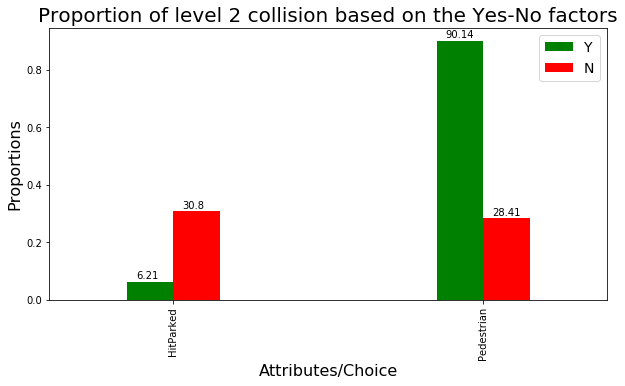

In [26]:
HPC = collision_data.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts(normalize=True)
PONR = collision_data.groupby(['PEDROWNOTGRNT'])['SEVERITYCODE'].value_counts(normalize=True)
ListHPC = [HPC['Y'][2], HPC['N'][2]]
ListPONR = [PONR['Y'][2], PONR['N'][2]]
dChoice = {'Choices':['Y','N'], 'HitParked': ListHPC, 'Pedestrian': ListPONR}
df_Choice = pd.DataFrame(data=dChoice)
df_Choice.set_index('Choices',inplace=True)
df_Choice = df_Choice.transpose()
df_Choice.plot(kind='bar', figsize=(10, 5),width=0.3,
             color=['green','red'])
plt.xlabel('Attributes/Choice', fontsize=16)
plt.ylabel('Proportions', fontsize=16)
plt.title('Proportion of level 2 collision based on the Yes-No factors',fontsize=20)
plt.legend(fontsize=14)
for i, proportionY in enumerate(df_Choice['Y']):
    plt.annotate(round(100*proportionY,2), # text to display
    xy=(i-0.12, proportionY+0.01))
for j, proportionN in enumerate(df_Choice['N']):
    plt.annotate(round(100*proportionN,2), # text to display
    xy=(j+0.03, proportionN+0.01))

In [23]:
import itertools
import scipy
from scipy.cluster import hierarchy 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
collision_data['PEDROWNOTGRNT'].replace(to_replace=['N','Y'], value = [0,1], inplace = True)
Feature = collision_data[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
y = collision_data['SEVERITYCODE']
X = Feature
y = collision_data['SEVERITYCODE']
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X[0:5]

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:22: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


array([[-0.33, -0.19, -0.17,  0.13],
       [-0.33, -0.19, -0.17,  0.13],
       [ 1.16, -0.19, -0.17,  1.71],
       [ 0.41, -0.19, -0.17,  1.71],
       [-0.33, -0.19, -0.17,  0.13]])

[0.73 0.74 0.74 0.74 0.74 0.76 0.76 0.76 0.75 0.75]


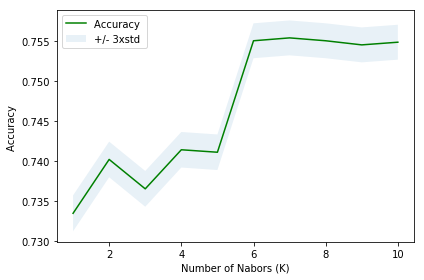

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

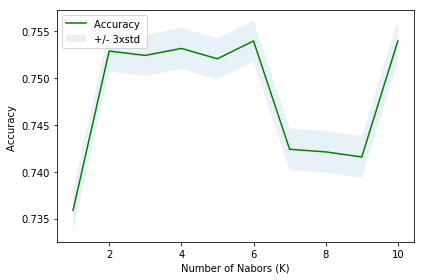

In [32]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7539232053422371 with k= 6


In [34]:
from sklearn import svm
SvM = svm.SVC(kernel='rbf')
SvM.fit(X_train, y_train)
yhat_svm = SvM.predict(X_test)
yhat_svm [0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 2, 1])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.76      0.97      0.85     27425
           2       0.79      0.25      0.38     11510

   micro avg       0.76      0.76      0.76     38935
   macro avg       0.77      0.61      0.62     38935
weighted avg       0.77      0.76      0.71     38935

Confusion matrix, without normalization
[[26643   782]
 [ 8603  2907]]


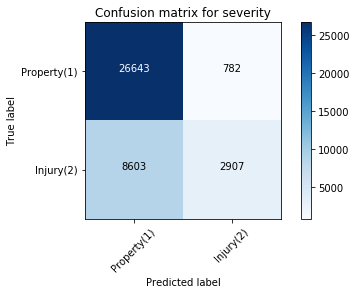

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property(1)','Injury(2)'],normalize= False,  title='Confusion matrix for severity')

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = collision_data[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
collision_data["SEVERITYCODE"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
collision_data[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SEVERITYCODE']].head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
from sklearn import metrics
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # it shows the default parameters
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7532554257095159


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat3 = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.71, 0.29],
       [0.76, 0.24],
       [0.94, 0.06],
       ...,
       [0.76, 0.24],
       [0.76, 0.24],
       [0.64, 0.36]])

In [39]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
d = {'Algorithm': ['KNN','Decision Tree','SVM','LogisticRegression'], 
     'Jaccard': [jaccard_similarity_score(y_test,yhat), jaccard_similarity_score(y_test,predTree), jaccard_similarity_score(y_test,yhat_svm),jaccard_similarity_score(y_test,yhat3)],
     'F1-score': [f1_score(y_test,yhat), f1_score(y_test,predTree), f1_score(y_test,yhat_svm), f1_score(y_test,yhat3)],
     'LogLoss': [np.nan, np.nan, np.nan, log_loss(y_test, yhat_prob)]}
dat = pd.DataFrame(data=d)
dat

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.753923,0.849339,NaN
1,Decision Tree,0.753255,0.849620,NaN
2,SVM,0.758957,0.850250,NaN
3,LogisticRegression,0.754411,0.849189,0.537717


In [40]:
dat.set_index('Algorithm', inplace=True)

In [41]:
dat

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.753923,0.849339,NaN
Decision Tree,0.753255,0.849620,NaN
SVM,0.758957,0.850250,NaN
LogisticRegression,0.754411,0.849189,0.537717


              precision    recall  f1-score   support

           1       0.75      0.98      0.85     27425
           2       0.85      0.20      0.33     11510

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.80      0.59      0.59     38935
weighted avg       0.78      0.75      0.70     38935

Confusion matrix, without normalization
[[27006   419]
 [ 9162  2348]]


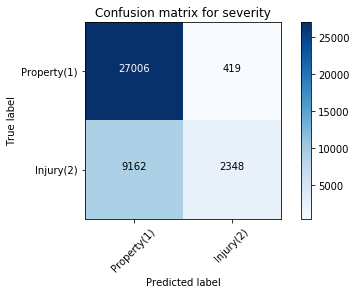

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property(1)','Injury(2)'],normalize= False,  title='Confusion matrix for severity')

              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27425
           2       0.88      0.19      0.31     11510

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.81      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935

Confusion matrix, without normalization
[[27139   286]
 [ 9321  2189]]


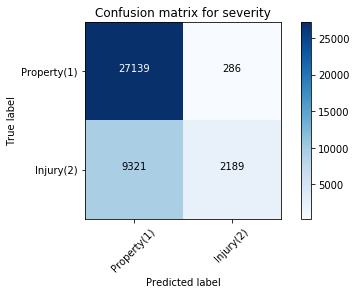

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property(1)','Injury(2)'],normalize= False,  title='Confusion matrix for severity')

              precision    recall  f1-score   support

           1       0.75      0.98      0.85     27425
           2       0.83      0.21      0.34     11510

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.79      0.60      0.59     38935
weighted avg       0.77      0.75      0.70     38935

Confusion matrix, without normalization
[[26931   494]
 [ 9075  2435]]


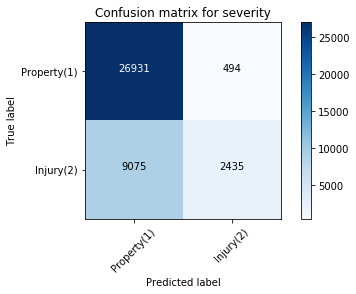

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property(1)','Injury(2)'],normalize= False,  title='Confusion matrix for severity')

In [8]:
import itertools
import scipy
from scipy.cluster import hierarchy 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
collision_data['HITPARKEDCAR'].replace(to_replace=['N','Y'], value = [0,1], inplace = True)
Feature = collision_data[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','HITPARKEDCAR','PEDROWNOTGRNT','DayofWeek','Years']]
y = collision_data['SEVERITYCODE']
X = Feature
y = collision_data['SEVERITYCODE']
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X[0:5]

Train set: (155738, 8) (155738,)
Test set: (38935, 8) (38935,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:22: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


array([[-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.19619929,
        -0.1567239 , -0.48852801,  0.39603209],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.19619929,
        -0.1567239 , -0.48852801, -1.10066013],
       [ 1.15576451, -0.18743029, -0.16958841,  1.7102107 , -0.19619929,
        -0.1567239 ,  0.03188685, -1.52828648],
       [ 0.41278122, -0.18743029, -0.16958841,  1.7102107 , -0.19619929,
        -0.1567239 ,  0.55230171,  0.39603209],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.19619929,
        -0.1567239 , -0.48852801, -1.52828648]])

[0.65812251 0.71498652 0.6851419  0.73024271 0.71855657 0.7405933
 0.73191216 0.74457429 0.73265699 0.74719404]


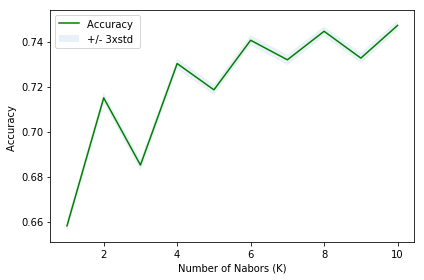

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [11]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7471940413509696 with k= 10


In [25]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat3 = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # it shows the default parameters
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7532554257095159


In [16]:
from sklearn import svm
SvM = svm.SVC(kernel='rbf')
SvM.fit(X_train, y_train)
yhat_svm = SvM.predict(X_test)
yhat_svm [0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 2, 1])

In [17]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
d = {'Algorithm': ['KNN','Decision Tree','SVM','LogisticRegression'], 
     'Jaccard': [jaccard_similarity_score(y_test,yhat), jaccard_similarity_score(y_test,predTree), jaccard_similarity_score(y_test,yhat_svm),jaccard_similarity_score(y_test,yhat3)],
     'F1-score': [f1_score(y_test,yhat), f1_score(y_test,predTree), f1_score(y_test,yhat_svm), f1_score(y_test,yhat3)],
     'LogLoss': [np.nan, np.nan, np.nan, log_loss(y_test, yhat_prob)]}
dat = pd.DataFrame(data=d)
dat

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.747194,0.840777,NaN
1,Decision Tree,0.753230,0.849607,NaN
2,SVM,0.759060,0.850385,NaN
3,LogisticRegression,0.754925,0.849296,0.537048


              precision    recall  f1-score   support

           1       0.76      0.97      0.85     27425
           2       0.79      0.25      0.38     11510

   micro avg       0.76      0.76      0.76     38935
   macro avg       0.77      0.61      0.62     38935
weighted avg       0.77      0.76      0.71     38935

              precision    recall  f1-score   support

           1       0.76      0.95      0.84     27425
           2       0.68      0.27      0.39     11510

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.72      0.61      0.61     38935
weighted avg       0.73      0.75      0.71     38935

              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27425
           2       0.88      0.19      0.31     11510

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.81      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935

              preci

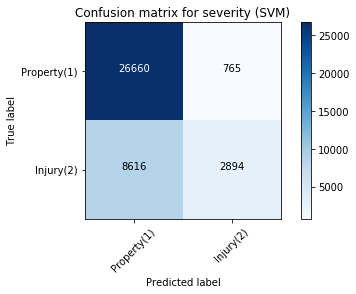

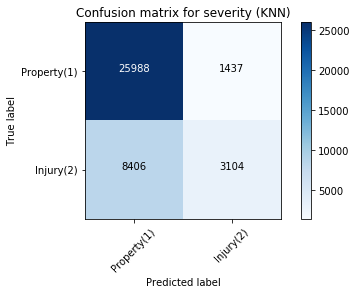

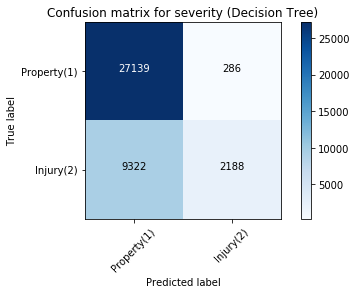

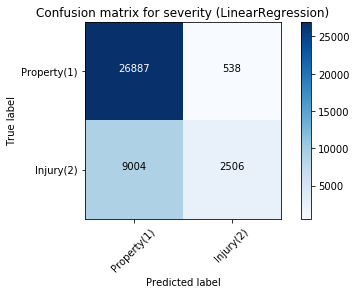

In [22]:
# Compute confusion matrix
cnf_matrix_svm = confusion_matrix(y_test, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

cnf_matrix_KNN = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

cnf_matrix_dec = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)

cnf_matrix_Reg = confusion_matrix(y_test, yhat3, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))
print (classification_report(y_test, yhat))
print (classification_report(y_test, predTree))
print (classification_report(y_test, yhat3))

# Plot non-normalized confusion matrix
plt.figure(1)
plot_confusion_matrix(cnf_matrix_svm, classes=['Property(1)','Injury(2)'],normalize= False,  title='Confusion matrix for severity (SVM)')
# Plot non-normalized confusion matrix
plt.figure(2)
plot_confusion_matrix(cnf_matrix_KNN, classes=['Property(1)','Injury(2)'],normalize= False,  title='Confusion matrix for severity (KNN)')
# Plot non-normalized confusion matrix
plt.figure(3)
plot_confusion_matrix(cnf_matrix_dec, classes=['Property(1)','Injury(2)'],normalize= False,  title='Confusion matrix for severity (Decision Tree)')
# Plot non-normalized confusion matrix
plt.figure(4)
plot_confusion_matrix(cnf_matrix_Reg, classes=['Property(1)','Injury(2)'],normalize= False,  title='Confusion matrix for severity (LinearRegression)')